In [1]:
##################
# Load libraries #
##################

from get_strava_data import my_data, process_data, get_elevation

import requests

import pandas as pd
import numpy as np

from PIL import Image
import base64

import ast
import polyline

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import IFrame
from folium.features import CustomIcon

import plotly.express as px


In [2]:
print("folium.__version__",folium.__version__)

folium.__version__ 0.11.0


In [3]:
polylines_df = pd.read_csv('./data/processed_data.csv', usecols=['name', 'distance', 'total_elevation_gain', 'average_speed', 'weighted_average_watts', 'year', 'month', 'day', 'type', 'map'])
polylines_df = polylines_df[polylines_df.type == 'Ride'] # We'll only use rides which have a map

ride_names = polylines_df.name


# We'll choose rides by index to avoid duplicate names 
ride_index = 3
decoded = pd.json_normalize(polylines_df[polylines_df.index == ride_index]['map'].apply(ast.literal_eval))['summary_polyline'].apply(polyline.decode).values[0]


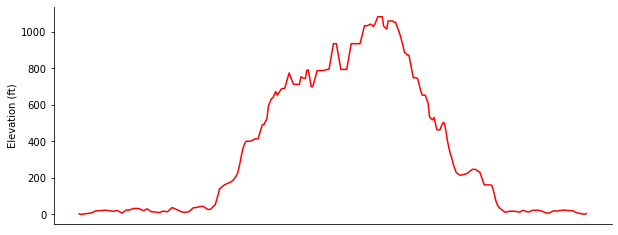

In [6]:
# Adding elevation data from Open Street Map
elevation_profile = [get_elevation(coord[0], coord[1]) for coord in decoded]
elevation_profile_feet = [elevation_profile[i] * 3.28084 for i in range(len(elevation_profile))] # Converting elevation to feet

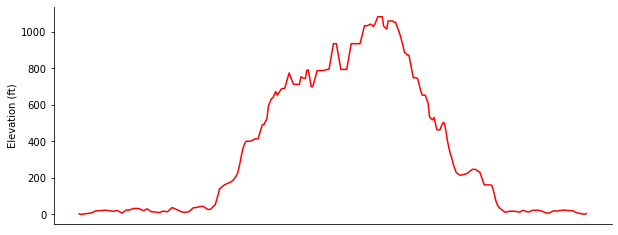

In [11]:
# Plotting elevation data
fig, ax = plt.subplots(figsize=(10, 4))
ax = pd.Series(elevation_profile_feet).rolling(3).mean().plot(
    ax=ax, 
    color='red', 
    legend=False
)
ax.set_ylabel('Elevation (ft)')
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Saving plot
plt.savefig('./data/elevation_profile.png', dpi=300)

In [5]:
# Mapping route with folium

png = './data/elevation_profile.png'

encoded = base64.b64encode(open(png, 'rb').read())



html = '<img src="data:image/png;base64,{}">'.format
# iframe = IFrame(html(), width=632+20, height=420+20)
# popup = folium.Popup(iframe, max_width=2650)

centroid = [
    np.mean([coord[0] for coord in decoded]), 
    np.mean([coord[1] for coord in decoded])
]
my_map = folium.Map(location=centroid, zoom_start=13)
folium.PolyLine(decoded).add_to(my_map)

my_map